In [1]:
# https://www.kaggle.com/shrutimechlearn/deep-tutorial-1-ann-and-classification
# http://hk.uwenku.com/question/p-prqzvpoo-mr.html

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from matplotlib.font_manager import findfont , FontProperties
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
import graphviz

In [2]:
# ANN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Activation , Dense , BatchNormalization , Conv2D
from tensorflow.keras.optimizers import Adagrad , Adam , SGD , RMSprop , Adadelta ,Nadam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold , cross_val_score

Random under-sampling:
1    4944
0    4944
Name: 心血管疾病, dtype: int64


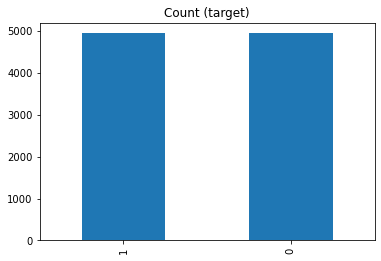

In [3]:
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
df = pd.read_csv(r"C:\\Users\\USER\\Desktop\\python_practice\\CVD_ALL.csv",encoding = 'big5')

# 清除遺漏值
df = df.dropna()
# Class count
count_class_0, count_class_1 = df['心血管疾病'].value_counts()

# Divide by class
df_class_0 = df[df['心血管疾病'] == 0]
df_class_1 = df[df['心血管疾病'] == 1]

# 使用undersampling 從 non-disease 資料中取出跟 disease者數量相當的樣本
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['心血管疾病'].value_counts())

df_test_under['心血管疾病'].value_counts().plot(kind='bar', title='Count (target)');

In [4]:
df_test_under.describe()

,ID,心血管疾病,年齡,性別,追蹤時間,腰圍,收縮壓,舒張壓,空腹血糖,高密度脂蛋白,三酸甘油酯,檳榔,飲酒,家族病史,抽菸,抽菸量
count,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000
mean,30848.372977,0.500000,51.635518,0.375708,3.898665,80.048129,126.851082,79.393103,95.926173,57.350698,129.584547,0.057342,0.223503,0.043689,0.264462,0.297431
std,18539.426294,0.500025,14.444477,0.484330,1.231743,10.760699,22.257770,12.189879,33.653441,11.483358,120.778251,0.232507,0.416614,0.204413,0.441069,0.530095
min,2.000000,0.000000,20.000000,0.000000,1.000000,37.000000,70.000000,43.000000,58.000000,14.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15021.750000,0.000000,41.000000,0.000000,3.000000,72.000000,111.000000,71.000000,81.000000,50.800000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28586.500000,0.500000,51.000000,0.000000,4.000000,80.000000,124.000000,78.500000,87.000000,57.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47001.500000,1.000000,63.000000,1.000000,5.000000,87.000000,140.000000,87.000000,96.000000,63.000000,150.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,64477.000000,1.000000,80.000000,1.000000,5.000000,175.000000,276.000000,140.000000,432.000000,128.000000,4137.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
label = df_test_under.columns[2:]
X = df_test_under[label]
y = df_test_under["心血管疾病"]

# 切割出訓練集與測試集
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=42)

In [6]:
# 建立ANN model
model = Sequential([
Dense(12, input_shape=(14, ), activation='relu'),
Dense(8,activation='softmax'),
Dense(4, activation='relu'),
Dense(1, activation='relu')
])
print(model.summary())
adam = Adam(learning_rate = 0.001)
model.compile(optimizer = "adam" , loss = "binary_crossentropy",metrics=["accuracy"])
# 訓練此模型
history = model.fit(x=X_train, y=y_train.values,
                    batch_size=50, epochs=150,
                    verbose=2,
                    shuffle=True,validation_split=0.1)

# 用於評估已經過訓練的模型。返回模型的損失值&指標值。
model.evaluate(X_test, y_test.values, verbose=2)
# #也可以寫
# model = Sequential()
# model.add(Dense(12,input_shape=(14, ) ,activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='relu'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
143/143 - 3s - loss: 0.9367 - accuracy: 0.5012 - val_loss: 0.7389 - val_accuracy: 0.4703
Epoch 2/150
143/143 - 0s - loss: 0.7007 - accuracy: 0.5012 - val_loss: 0.6955 - val_accuracy: 0.4703
Epoch 3/150
143/143 - 0s - loss: 0.6897 - accurac

Epoch 73/150
143/143 - 0s - loss: 0.5763 - accuracy: 0.7116 - val_loss: 0.5622 - val_accuracy: 0.7358
Epoch 74/150
143/143 - 0s - loss: 0.5806 - accuracy: 0.7088 - val_loss: 0.5789 - val_accuracy: 0.6966
Epoch 75/150
143/143 - 0s - loss: 0.5781 - accuracy: 0.7101 - val_loss: 0.5642 - val_accuracy: 0.7181
Epoch 76/150
143/143 - 0s - loss: 0.5762 - accuracy: 0.7146 - val_loss: 0.5523 - val_accuracy: 0.7396
Epoch 77/150
143/143 - 0s - loss: 0.5795 - accuracy: 0.7080 - val_loss: 0.5736 - val_accuracy: 0.7168
Epoch 78/150
143/143 - 0s - loss: 0.5767 - accuracy: 0.7106 - val_loss: 0.5517 - val_accuracy: 0.7459
Epoch 79/150
143/143 - 0s - loss: 0.5787 - accuracy: 0.7119 - val_loss: 0.5633 - val_accuracy: 0.7282
Epoch 80/150
143/143 - 0s - loss: 0.5788 - accuracy: 0.7102 - val_loss: 0.5532 - val_accuracy: 0.7421
Epoch 81/150
143/143 - 0s - loss: 0.5735 - accuracy: 0.7144 - val_loss: 0.5555 - val_accuracy: 0.7320
Epoch 82/150
143/143 - 0s - loss: 0.5779 - accuracy: 0.7087 - val_loss: 0.5550 - v

[0.5589746236801147, 0.712841272354126]

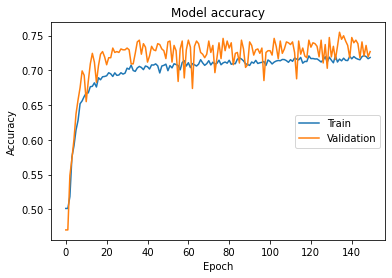

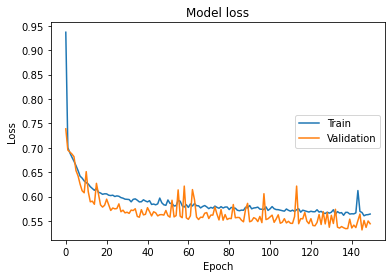

In [7]:
# plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()

Accuracy: 0.71284
Precision: 0.65835
Recall: 0.86653
F1: 0.74823
Confusion matrix

 [[566 438]
 [130 844]]


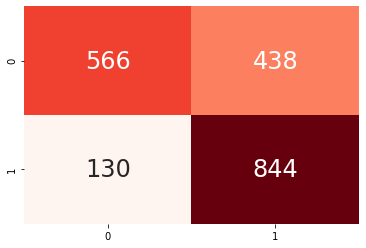

In [8]:
y_ann_predict = model.predict(X_test)
# ANN的預測結果為0~1的小數 需轉換成0,1 以0.5為標準
y_ann_predict = (y_ann_predict > 0.5)

# 衡量預測後的結果
acc = accuracy_score(y_test, y_ann_predict)
accuracy_dict, precision_dict, recall_dict, f1_dict = dict(), dict(), dict(), dict()
precision, recall, f1, support = precision_recall_fscore_support(y_test ,y_ann_predict, average='binary')
acc, precision, recall, f1 = round(acc, 5), round(precision, 5), round(recall, 5), round(f1, 5)
    
accuracy_dict["Decision Tree"] = acc
precision_dict["Decision Tree"] = precision
recall_dict["Decision Tree"] = recall
f1_dict["Decision Tree"] = f1
print(f'Accuracy: {acc}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')
# Confusion matrix for ANN
cm = confusion_matrix(y_test, y_ann_predict)

print('Confusion matrix\n\n', cm)

plt = sns.heatmap(cm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

In [9]:
y_ann_predict

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [10]:
y_test

43064    0
1026     0
25226    1
43868    0
27577    1
        ..
24842    1
40300    0
13963    0
50021    0
63057    0
Name: 心血管疾病, Length: 1978, dtype: int64

In [11]:
# Cross-Validation
# https://ithelp.ithome.com.tw/articles/10197461
def model_cv():
    model = Sequential([
    Dense(12, input_shape=(14, ), activation='relu'),
    Dense(8,activation='softmax'),
    Dense(4, activation='relu'),
    Dense(1, activation='relu')
    ])
#     print(model.summary())
    adam = Adam(learning_rate = 0.001)
    model.compile(optimizer = "adam" , loss = "binary_crossentropy",metrics=["accuracy"])
    return model

# start cross-validation
estimator = KerasClassifier(build_fn = model_cv , epochs = 100 , batch_size = 200, verbose = 0)
kfold = KFold(n_splits = 10 , shuffle = True)
result = cross_val_score(estimator , X , y , cv = kfold)
print(result)
print("model performance: mean = {} , std ={}".format(result.mean()*100,result.std()*100))

[0.50455004 0.49342769 0.70980787 0.7057634  0.70879674 0.67745197
 0.51971686 0.50455004 0.68927127 0.49898785]
model performance: mean = 60.1232373714447 , std =9.760187431424306
